<h3>Import Needed Libraries</h3>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

<h3>Load MNIST Dataset, Split it into Train & Test</h3>

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(
    "Training Data Shape is {} ,  Its Type Is {} ,\nTest Data Shape is {} , Its Type is {} ".format(
        train_images.shape, type(train_images) , test_images.shape , type(test_images)
    )
)

Training Data Shape is (60000, 28, 28) ,  Its Type Is <class 'numpy.ndarray'> ,
Test Data Shape is (10000, 28, 28) , Its Type is <class 'numpy.ndarray'> 


In [6]:

print(
    "Training Data Shape is {} ,  Its Type Is {} ,\nTest Data Shape is {} , Its Type is {} ".format(
        train_images.shape, type(train_images) , test_images.shape , type(test_images)
    )
)

Training Data Shape is (60000, 28, 28) ,  Its Type Is <class 'numpy.ndarray'> ,
Test Data Shape is (10000, 28, 28) , Its Type is <class 'numpy.ndarray'> 


<h3>Display Images</h3>

In [7]:
def showImage(imgIndex):
    image = imgIndex
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

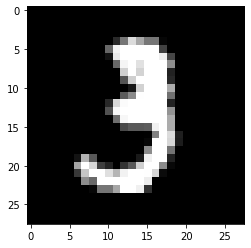

In [8]:
showImage(train_images[10])

In [9]:
train_labels[10]

3

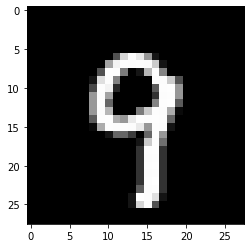

In [10]:
showImage(train_images[162])

In [11]:
train_labels[162]

9

<h3>Reshape Image To Smaller Grids </h3>

In [15]:
# This funstion will be used to reshape the images into 
# grid with dimensions row * col (7*7, 14*14, to be compatible with the original size 28*28 )
def reshapeImage(image , row , col ):
    x , y = image.shape
 # The assert statement is used to continue the execute if the given condition evaluates to True.
 # If the assert condition evaluates to False,
 # then it raises the AssertionError exception with the specified error message.
    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)

    return (image.reshape ( x //row, row, -1, col)
               .swapaxes(1,2)
               .reshape(-1, row, col))

In [16]:
print(reshapeImage(test_images[2] , 7 , 7 ).shape)
reshapeImage(test_images[2] , 7, 7 )


(16, 7, 7)


array([[[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,  38, 254, 109,   0,   0],
        [  0,   0,  87, 252,  82,   0,   0],
        [  0,   0, 135, 241,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
    

<h3>Feature Extraction</h3><br>

In this section, I will use the images, after being reshaped with the desired grid size, and for each block I will extract the centroid of it.<br><br>



In [17]:
def calculateCentroid(image):
    
    featureVector = []
 
    for grid in reshapeImage(image , 7 , 7 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
    
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
            featureVector.append( Xc/ sum )
            featureVector.append(Yc/ sum )
        else :
             featureVector.append(0)
             featureVector.append(0)
        
    
    return np.array(featureVector)

In [18]:
# Feature Extraction from training dataset
train_features = [calculateCentroid(img)  for img in train_images  ]


In [19]:
train_features = np.array(train_features)

In [20]:
train_features.shape

(60000, 32)

In [21]:
# Feature Extraction from test dataset
test_features = [calculateCentroid(img)  for img in test_images  ]

In [22]:
test_features = np.array(test_features)

In [23]:
test_features.shape

(10000, 32)

<h3>Classification Using KNN Classifier</h3>

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_features, train_labels)
# Calculate the accuracy of the model
print("Accuracy Score =", knn.score(test_features, test_labels) * 100, "%")


Accuracy Score = 91.16 %


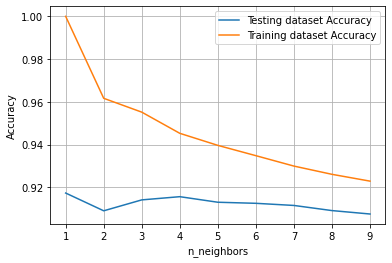

In [25]:
#iterating to try different values of k


neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(train_features, train_labels)
    test_accuracy[i] = knn.score(test_features, test_labels)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_features, train_labels)
# Calculate the accuracy of the model
print("Accuracy Score =", knn.score(test_features, test_labels) * 100, "%")


Accuracy Score = 91.74 %


<h3>Conclusion<h3>
<b> 

   
    The highest accuracy is 91.74% with k = 1.
